# About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

## Attribute information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading dataset 
# header = 1 will remove the default header of the csv file and will use the first row(columns name) as the default header

data = pd.read_csv(r'F:\Data Science\Datasets\Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

### Removing null values

In [5]:
# checking null values

data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
# index that contains null values

data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


- Index 122 and 167 contains null values.   
- we can remove it.  
- Check CSV file, 122nd row is just a division between regions.

The dataset is divided into two sets based on region.   

1. Till 122nd index it is region 'Bejaia'   
2. from 122nd index it is region 'sidi-Bel Abbes'.  
  
We can create a new column called region that contains 0 as Bejaia and 1 as sidi-Bel  

In [7]:
# Creating region columns with values 0 and 1

data.loc[:122, "Region"] = 0
data.loc[122:, "Region"] = 1
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


Region is in float64 dtype. we can convert it to int dtype as int takes only lesser memory.

In [9]:
# converting float65 to int

data[['Region']]=data[['Region']].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [10]:
# droping null values and resetting index as removing rows could lead to differences in the index

data = data.dropna(how = 'any').reset_index(drop = True)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.8+ KB


In [13]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


- Check the csv file row 127 is unnecessary as it contains only header for region sidi-bel abbes.
- We can also remove it.

In [14]:
# removing 122nd row

data = data.drop(122).reset_index(drop = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


- Removed 127th row as per csv and in this notebook it is 122nd row. 
- Check the number of rows before and after removing null values. From 246 to reduced to 243.

### Fixing column names

In [16]:
# observe column name
# check ' RH' and ' WS' and 'Classes ' columns name it has some unwanted spaces in it. we can remove those spaces

data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
# fixing spaces in column names

data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

- Now the unwanted spaces have been removed from columns names.

### Changing dtypes

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [19]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


- If we observe the info of the dataset all the features has dtype as 'object' even though it contains numerical features.
- we can change the dtypes of those features accordingly.
- From day to Ws the dtype can be int.
- Other features can be float and classes can object.

In [20]:
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [21]:
# converting object to floats using a more generic code

objects = [features for features in data.columns if data[features].dtypes == 'O']           # 'O' refers to object dtype
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [22]:
for i in objects:
    if i != 'Classes':
        data[i] = data[i].astype(float) 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [24]:
# saving the cleaned dataset to this notebook's location

# data.to_csv('Algerian_forest_fires_cleaned.csv', index = False)

In [25]:
data1 = data.copy()

# Exploratory Data Analysis

In [26]:
# droping few features 

data_copy = data1.copy()
data_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### encoding classes feature

In [27]:
# checking the values of classes

data_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [28]:
# encoding classes feature

data_copy['Classes'] = np.where(data_copy['Classes'] == 'not fire', 0, 1)
data_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [29]:
data_copy['Classes'].value_counts()

1    241
0      2
Name: Classes, dtype: int64

- Observe both before and after encoding classes features carefully.
- Before encoding, we have a lot of records that contain 'not fire'. 'not fire' will be replaced with 0.
- But after encoding we have all the records that contain '1' i.e 'fire'.
- It is because the classes feature contains lot of categorical values (check value_counts before encoding) though the values look similar but they have blank spaces and this is the reason for the above problem where all the records have been encoded with 1.
- To solve this problem we modify our code.

In [30]:
# since data_copy is modified we are copying the data to data_copy1

data_copy1 = data1.copy()
data_copy1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [31]:
data_copy1['Classes'] = np.where(data_copy1['Classes'].str.contains('not fire'), 0, 1)
data_copy1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [32]:
data_copy1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [33]:
data_copy1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

- Now the encoding has worked properly. 

## Visualization

C:\Users\Gokul\AppData\Local\Temp\ipykernel_9988\4091111545.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


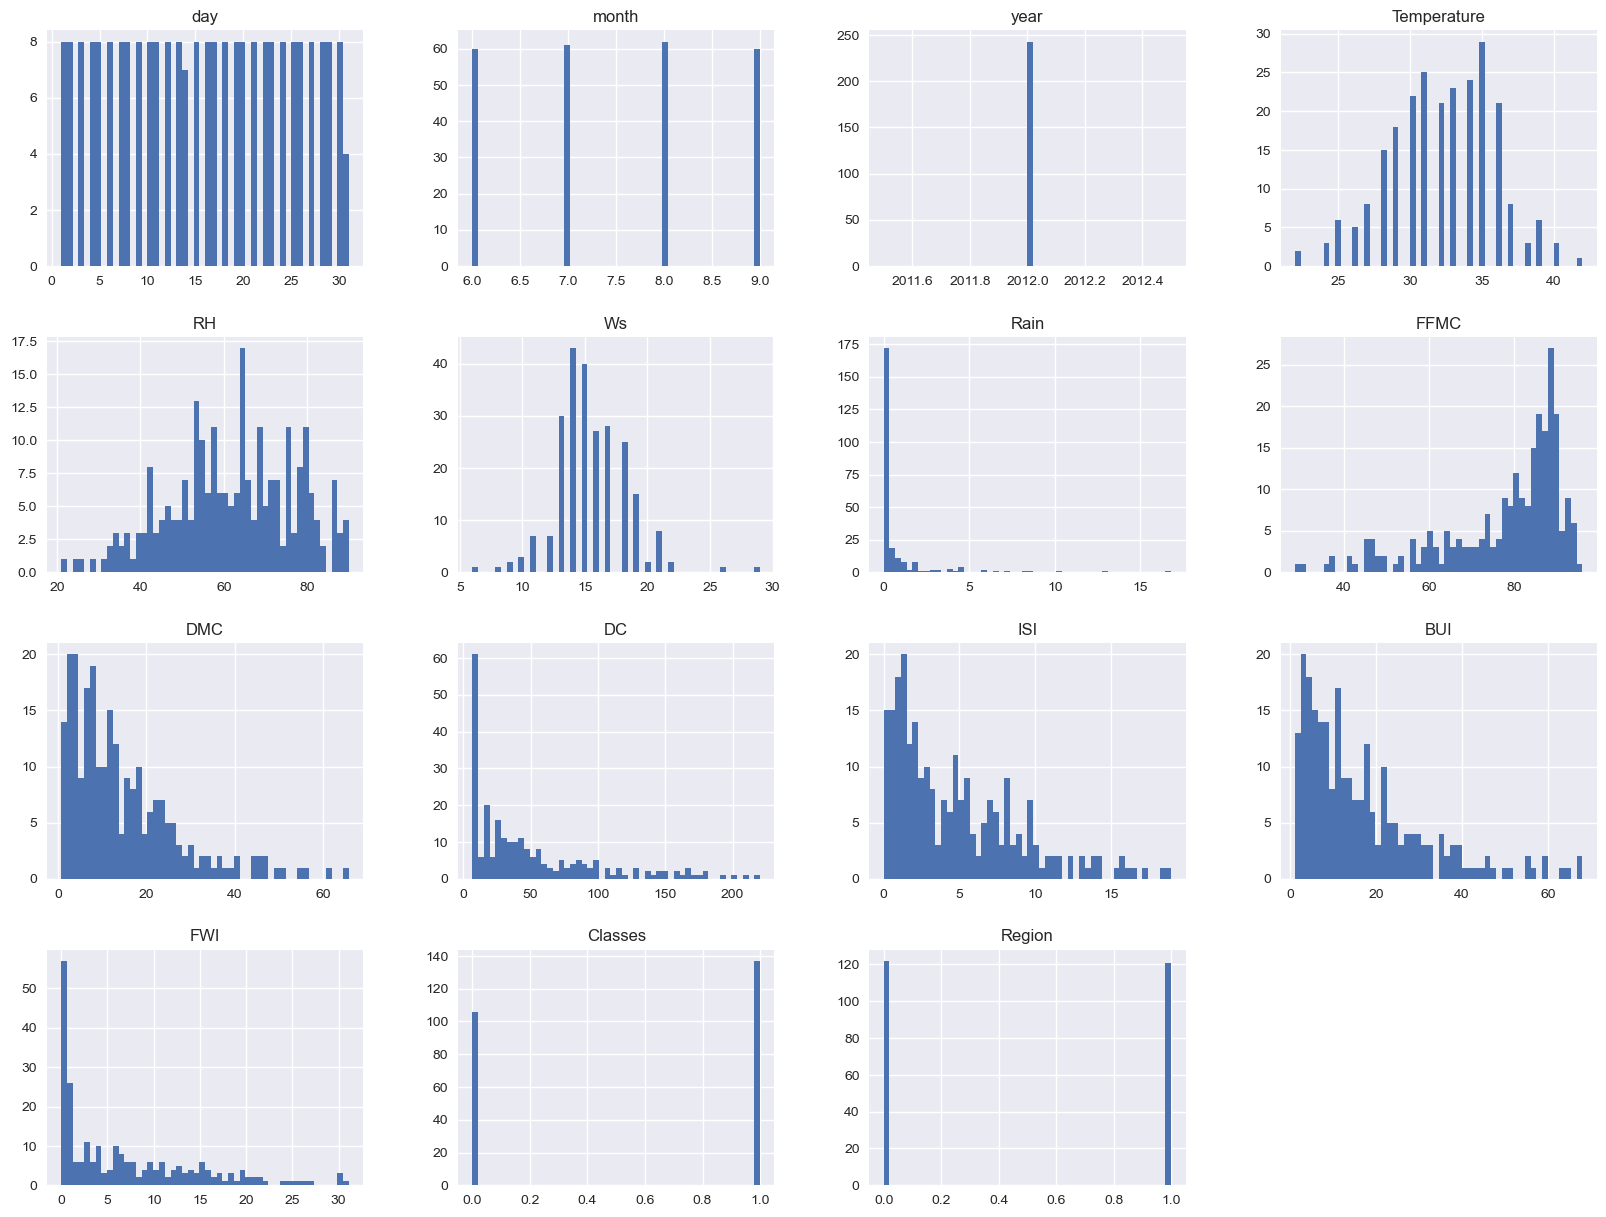

In [34]:
# denisty plot for all features

plt.style.use('seaborn')
data_copy1.hist(bins = 50, figsize=(20,15))
plt.show()

In [35]:
## percentage for pie chart

percentage = data_copy1['Classes'].value_counts(normalize = True) * 100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

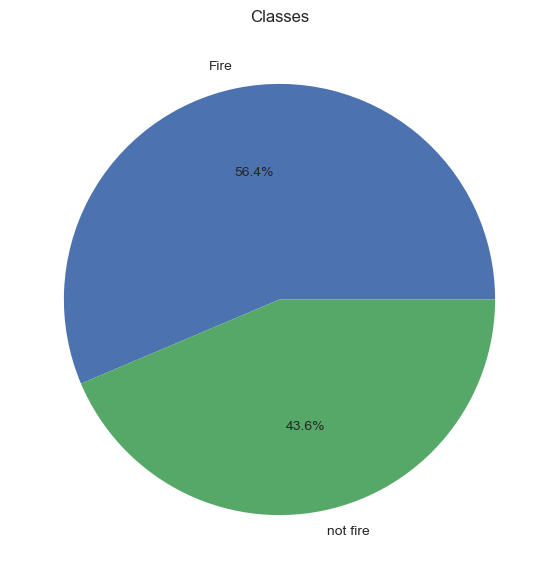

In [36]:
# plotting pie chart

classlabels = ['Fire', 'not fire']
plt.figure(figsize = (12, 7))
plt.pie(percentage, labels = classlabels, autopct = '%1.1f%%')
plt.title('Classes')
plt.show()

In [37]:
# correlation
# getting the correlation on all the features

data_copy1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

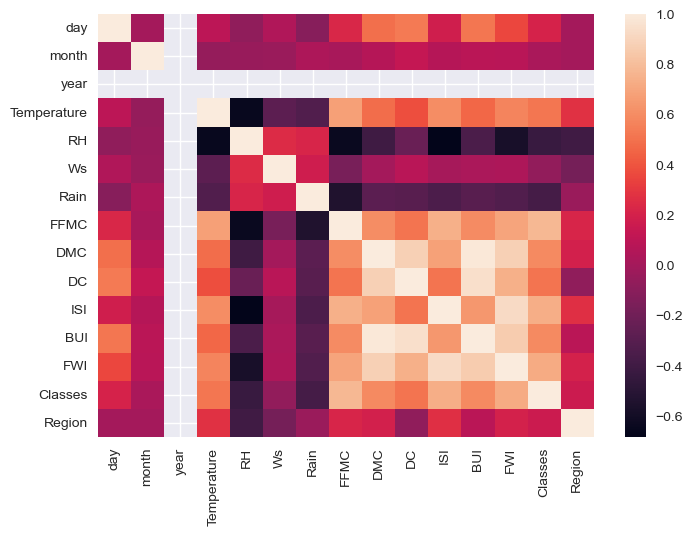

In [38]:
sns.heatmap(data_copy1.corr())

<Axes: >

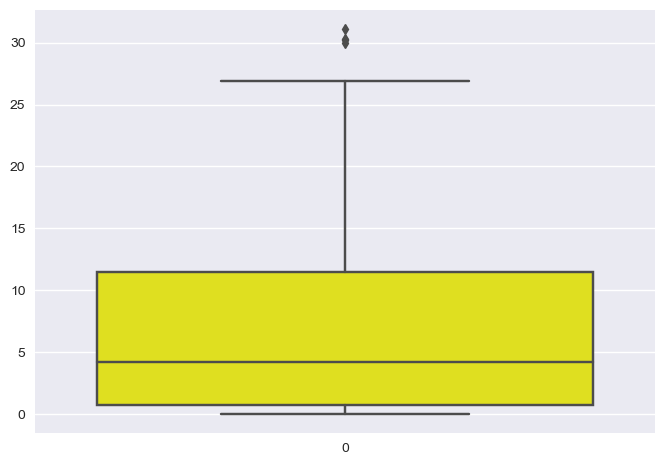

In [39]:
# box plot

sns.boxplot(data_copy1['FWI'], color = 'yellow')

Text(0.5, 1.0, 'Fire analysis of Sidi-bel region')

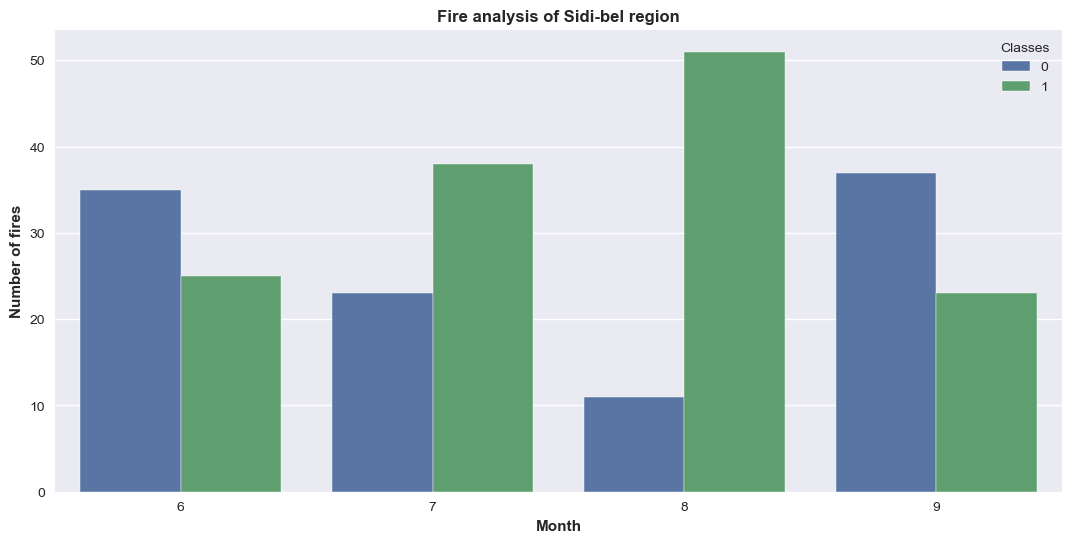

In [40]:
# monthly fire analysis using dates

datatemp = data_copy1.loc[data_copy1['Region']==1]
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = data_copy1)
plt.ylabel('Number of fires', weight = 'bold')
plt.xlabel('Month', weight = 'bold')
plt.title('Fire analysis of Sidi-bel region', weight = 'bold')

Text(0.5, 1.0, 'Fire analysis of bejaia region')

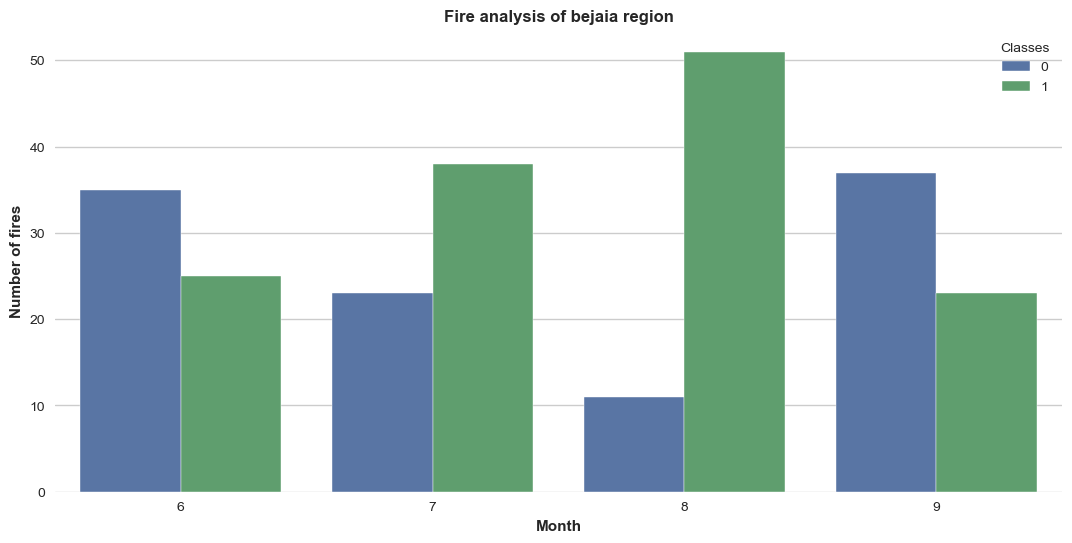

In [41]:
# monthly fire analysis using dates

datatemp = data_copy1.loc[data_copy1['Region']==0]
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = data_copy1)
plt.ylabel('Number of fires', weight = 'bold')
plt.xlabel('Month', weight = 'bold')
plt.title('Fire analysis of bejaia region', weight = 'bold')

### observation

It is observed that august and september had the most number of forest fires for both regions. And from the above plots we can understand a few things

Most of the fires happened in august and very high fires happened in only 3 months - June, July, August.

Less fire was on September.

## x and y variables

In [44]:
# independent and dependent features

x = data_copy1.drop('FWI', axis = 1)
y = data_copy1['FWI']

x.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [45]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [46]:
# train & test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [50]:
x_train.shape

(170, 14)

In [51]:
x_test.shape

(73, 14)

## Feature selection 

<Axes: >

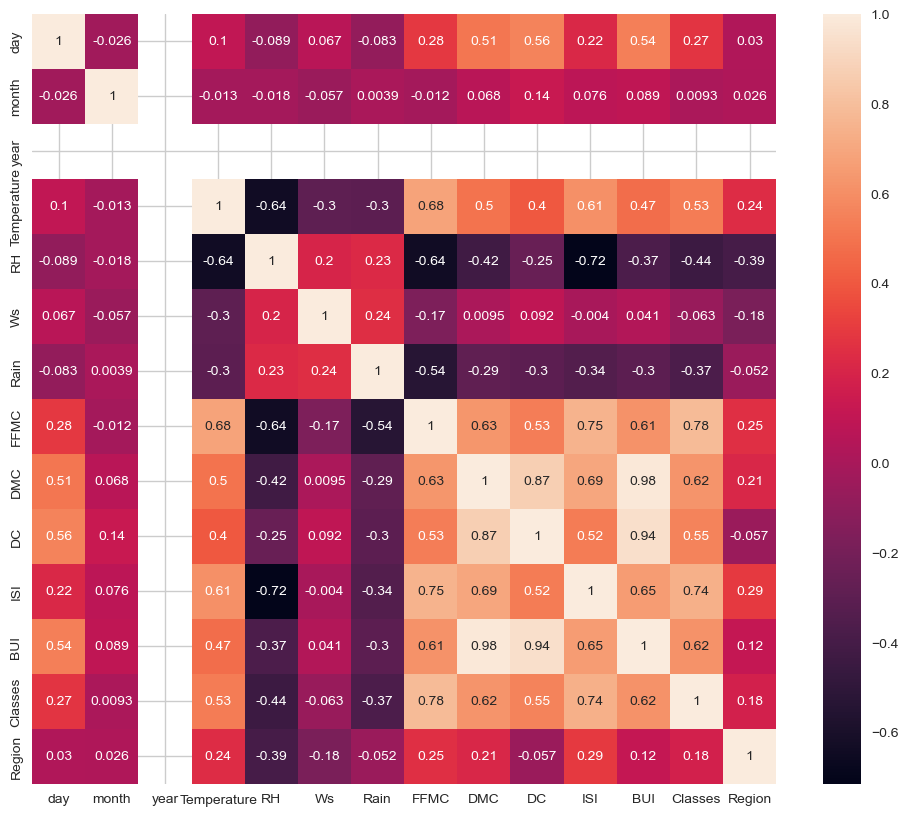

In [54]:
# checking multicollineariity

plt.figure(figsize = (12, 10))
corr = x_train.corr()
sns.heatmap(corr, annot = True)

In [55]:
# a function for finding features with high correlation

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(x_train, 0.85)
corr_features

{'BUI', 'DC'}

BUI and DC has a high positive correlation of above 85% with some features.  
BUI is highly correlated with DMC and DC.  
DC is highly correlated with Ws.  

In [59]:
# dropping BUI and DC

x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)

In [60]:
x_train.shape, x_test.shape

((170, 12), (73, 12))

## Feature Engineering

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [64]:
x_train_scaled

array([[ 1.56765151, -1.30687831,  0.        , ...,  0.57277215,
         0.90992142, -1.        ],
       [ 1.45605153,  1.39153439,  0.        , ..., -1.03570698,
        -1.098996  , -1.        ],
       [ 0.78645164,  1.39153439,  0.        , ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.66874796,  1.39153439,  0.        , ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 1.45605153, -0.40740741,  0.        , ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55274815,  1.39153439,  0.        , ..., -0.84921665,
        -1.098996  , -1.        ]])

C:\Users\Gokul\AppData\Local\Temp\ipykernel_9988\235726455.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'x_train after scalling')

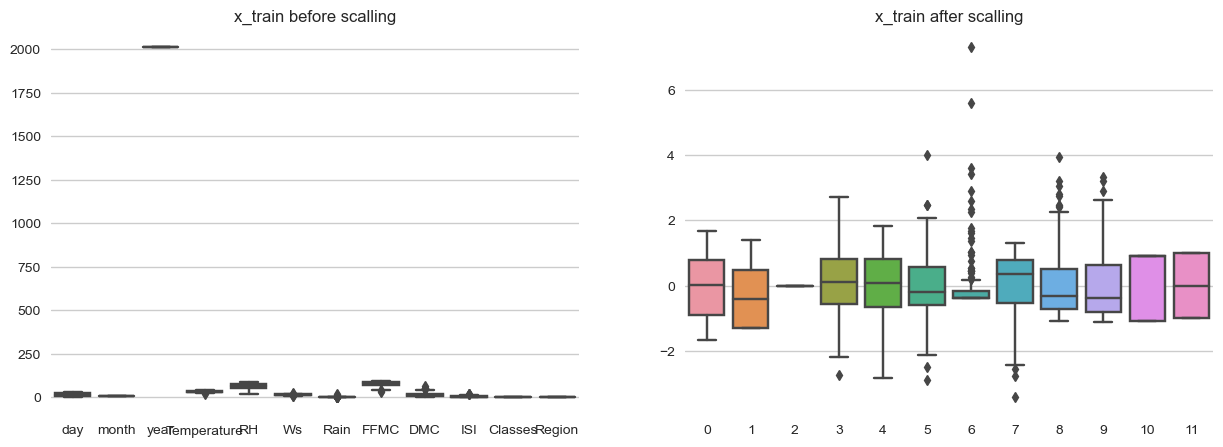

In [65]:
# visualizing after feature engineering

plt.subplots(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = x_train)
plt.title('x_train before scalling')

plt.subplot(1, 2, 2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train after scalling')

## Model training

## Linear regression

Mean Absolute Error 0.9648838800999608
R2 Score 0.9636796265802772


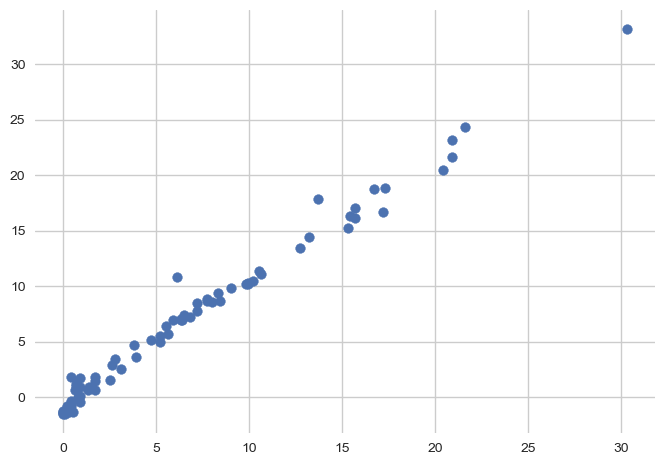

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Linreg = LinearRegression()
Linreg.fit(x_train_scaled, y_train)
y_pred = Linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', r2_score)
plt.scatter(y_test, y_pred)

-  Mae and R2 has good numbers.
- And y_test, y_pred has a linear trend which is perfect.

## Lasso regression

Mean Absolute Error 0.8679716002147722
R2 Score 0.9711535300984251


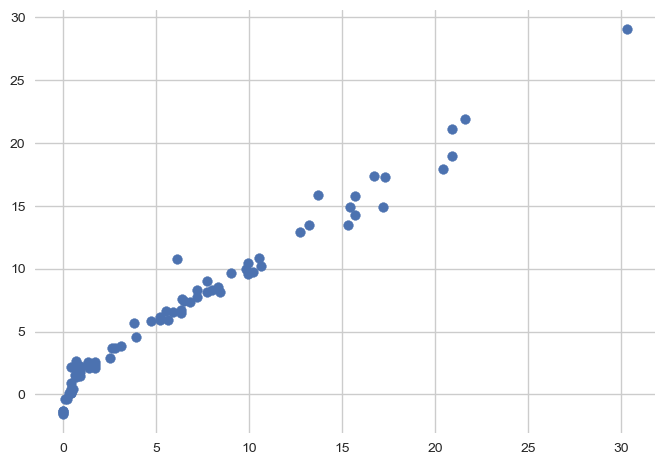

In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', r2_score)
plt.scatter(y_test, y_pred)

## Ridge regression

Mean Absolute Error 0.9632293231786095
R2 Score 0.9642183418582025


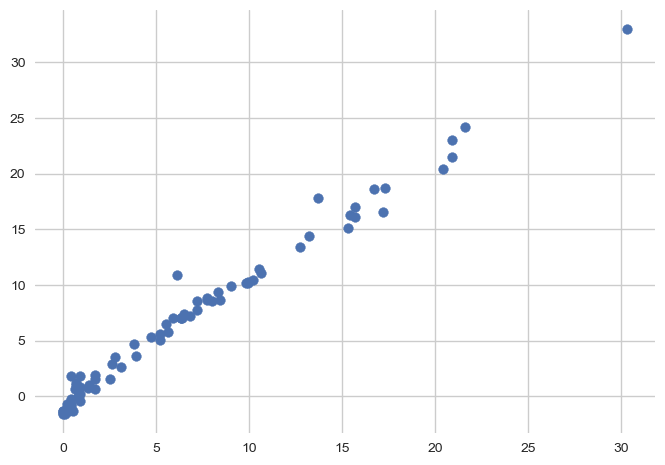

In [83]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', r2_score)
plt.scatter(y_test, y_pred)

## Elasticnet regression

In [84]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled, y_train)
y_pred = elasticnet.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', r2_score)

Mean Absolute Error 1.5733889494865163
R2 Score 0.9133538569176926


## Cross validation using LassoCV


In [89]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(x_train_scaled, y_train)
y_pred = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', r2_score)

TypeError: 'numpy.float64' object is not callable

In [87]:
# those alpha values that lassocv used

lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064